# Classifying handwritten digits

In [1]:
%pylab inline
%matplotlib inline

import matplotlib.pyplot as plt
from sklearn.datasets import fetch_mldata
import matplotlib.cm as cm

Populating the interactive namespace from numpy and matplotlib


In [3]:
###########################

# Data download
digits = fetch_mldata('MNIST original', data_home='data/mnist').data

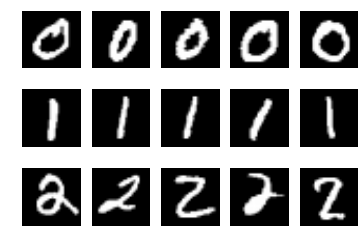

In [4]:
# Show Examples
counter = 1
for i in range(1, 4):
    for j in range(1, 6):
        plt.subplot(3, 5, counter)
        plt.imshow(
            digits[(i - 1) * 8000 + j].reshape((28, 28)),
            cmap=cm.Greys_r)
        plt.axis('off')
        counter += 1
plt.show()

In [5]:
from sklearn.datasets import fetch_mldata
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import scale
from sklearn.cross_validation import train_test_split
from sklearn.svm import SVC
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import classification_report

In [7]:
###########################

# Data set

data = fetch_mldata('MNIST original', data_home='data/mnist')
X, y = data.data, data.target
X = X/255.0*2 - 1

# Split data: Train, Test

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [9]:
###########################

# Grid Search

pipeline = Pipeline([
        ('clf', SVC(kernel='rbf', gamma=0.01, C=100))
])

print(X_train.shape)

parameters = {
    'clf__gamma': (0.01, 0.03, 0.1, 0.3, 1),
    'clf__C': (0.1, 0.3, 1, 3, 10, 30),
}

grid_search = GridSearchCV(
    pipeline,
    parameters,
    n_jobs=2,
    verbose=1,
    scoring='accuracy')

(52500, 784)


In [ ]:
###########################

# Compute Tuning

grid_search.fit(X_train[:10000], y_train[:10000])

print('Best score: %0.3f' % grid_search.best_score_
print('Best parameters set:'

best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
      print('\t%s: %r' % (param_name, best_parameters[param_name]))

predictions = grid_search.predict(X_test)
print(classification_report(y_test, predictions))

# Classifying characters in natural images

In [15]:
###########################

# import the necessary classes

import os
import numpy as np
from sklearn.svm import SVC
from sklearn.cross_validation import train_test_split
from sklearn.metrics import classification_report
import image

In [16]:
# resizes images using the Python Image Library:

def resize_and_crop(image, size):
    img_ratio = image.size[0] / float(image.size[1])
    ratio = size[0] / float(size[1])
    if ratio > img_ratio:
        image = image.resize(
            (size[0], size[0] * image.size[1] / image.size[0]), Image.ANTIALIAS)
        image = image.crop((0, 0, 30, 30))
    elif ratio < img_ratio:
        image = image.resize((size[1] * image.size[0] / image.size[1], size[1]), Image.ANTIALIAS)
        image = image.crop((0, 0, 30, 30))
    else:
        image = image.resize((size[0], size[1]), Image.ANTIALIAS)
    return image